# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [1]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [2]:
inDir = '/home/group/NSLSII_Data/CMS/2020_Cycle3/SWong/waxs/raw/'
print('The input dir is: %s'%inDir)



The input dir is: /home/group/NSLSII_Data/CMS/2020_Cycle3/SWong/waxs/raw/


In [3]:
outDir = '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/'

outDir = create_fullpath(  outDir )
outDir =  create_dir(  'Results/', outDir )
outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/PDF_Report/  already exists


## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [4]:
username_ = 'SW'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ 'Cell' ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

#flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )
flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_d'  ] )

Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 20 files for user: SW in this run.


In [5]:
flists

['SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35555_waxs.tiff',
 'SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35559_waxs.tiff',
 'SW_100nmAgNWs_50min_x0.000_y0.000_T-273.150C_30.00s_35560_waxs.tiff',
 'SW_100nmAgNWs_40min_x0.000_y0.000_T-273.150C_30.00s_35561_waxs.tiff',
 'SW_100nmAgNWs_30min_x-0.000_y0.000_T-273.150C_30.00s_35562_waxs.tiff',
 'SW_100nmAgNWs_25min_x0.000_y0.000_T-273.150C_30.00s_35563_waxs.tiff',
 'SW_100nmAgNWs_20min_x-0.000_y0.000_T-273.150C_30.00s_35564_waxs.tiff',
 'SW_100nmAgNWs_15min_x-0.000_y0.000_T-273.150C_30.00s_35565_waxs.tiff',
 'SW_100nmAgNWs_10min_x0.000_y0.000_T-273.150C_30.00s_35566_waxs.tiff',
 'SW_100nmAgNWs_5min_x-0.000_y0.000_T-273.150C_30.00s_35567_waxs.tiff',
 'SW_100nmAgNWs_1min_x-0.000_y0.000_T-273.150C_30.00s_35568_waxs.tiff',
 'SW_16nmAgNWs_1min_x0.500_y-0.300_T-273.150C_30.00s_35725_waxs.tiff',
 'SW_16nmAgNWs_5min_x-0.000_y0.000_T-273.150C_30.00s_35726_waxs.tiff',
 'SW_16nmAgNWs_10min_x-0.000_y0.000_T-273.150C_30.00s_35727_wax

In [6]:
flists_clean

array(['SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35555_waxs.tiff',
       'SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35559_waxs.tiff',
       'SW_100nmAgNWs_50min_x0.000_y0.000_T-273.150C_30.00s_35560_waxs.tiff',
       'SW_100nmAgNWs_40min_x0.000_y0.000_T-273.150C_30.00s_35561_waxs.tiff',
       'SW_100nmAgNWs_30min_x-0.000_y0.000_T-273.150C_30.00s_35562_waxs.tiff',
       'SW_100nmAgNWs_25min_x0.000_y0.000_T-273.150C_30.00s_35563_waxs.tiff',
       'SW_100nmAgNWs_20min_x-0.000_y0.000_T-273.150C_30.00s_35564_waxs.tiff',
       'SW_100nmAgNWs_15min_x-0.000_y0.000_T-273.150C_30.00s_35565_waxs.tiff',
       'SW_100nmAgNWs_10min_x0.000_y0.000_T-273.150C_30.00s_35566_waxs.tiff',
       'SW_100nmAgNWs_5min_x-0.000_y0.000_T-273.150C_30.00s_35567_waxs.tiff',
       'SW_100nmAgNWs_1min_x-0.000_y0.000_T-273.150C_30.00s_35568_waxs.tiff',
       'SW_16nmAgNWs_1min_x0.500_y-0.300_T-273.150C_30.00s_35725_waxs.tiff',
       'SW_16nmAgNWs_5min_x-0.000_y0.000_T-273.150C_30.00s_357

### Using a two-layered dict to sort the files 

In [7]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [8]:
cut_pattern= r'(_waxs)'
cut_pattern= r'(_x)'
sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
#ks =  sorted(list(sams.keys()))
ks =   list(sams.keys())
N = len(ks)
print( 'There are %s samples.'%(N))

There are 19 samples.


In [9]:
sams

{'SW_100nmAgNWs_60min': 2,
 'SW_100nmAgNWs_50min': 1,
 'SW_100nmAgNWs_40min': 1,
 'SW_100nmAgNWs_30min': 1,
 'SW_100nmAgNWs_25min': 1,
 'SW_100nmAgNWs_20min': 1,
 'SW_100nmAgNWs_15min': 1,
 'SW_100nmAgNWs_10min': 1,
 'SW_100nmAgNWs_5min': 1,
 'SW_100nmAgNWs_1min': 1,
 'SW_16nmAgNWs_1min': 1,
 'SW_16nmAgNWs_5min': 1,
 'SW_16nmAgNWs_10min': 1,
 'SW_16nmAgNWs_25min': 1,
 'SW_16nmAgNWs_30min': 1,
 'SW_16nmAgNWs_40min': 1,
 'SW_16nmAgNWs_50min': 1,
 'SW_16nmAgNWs_60min': 1,
 'SW_16nmAgNWs_90min': 1}

In [10]:
ks[0], sam_dict[ks[0]]

('SW_100nmAgNWs_60min',
 ['SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35555_waxs.tiff',
  'SW_100nmAgNWs_60min_x0.000_y0.000_T-273.150C_30.00s_35559_waxs.tiff'])

##  Load Mask if has one

<IPython.core.display.Javascript object>


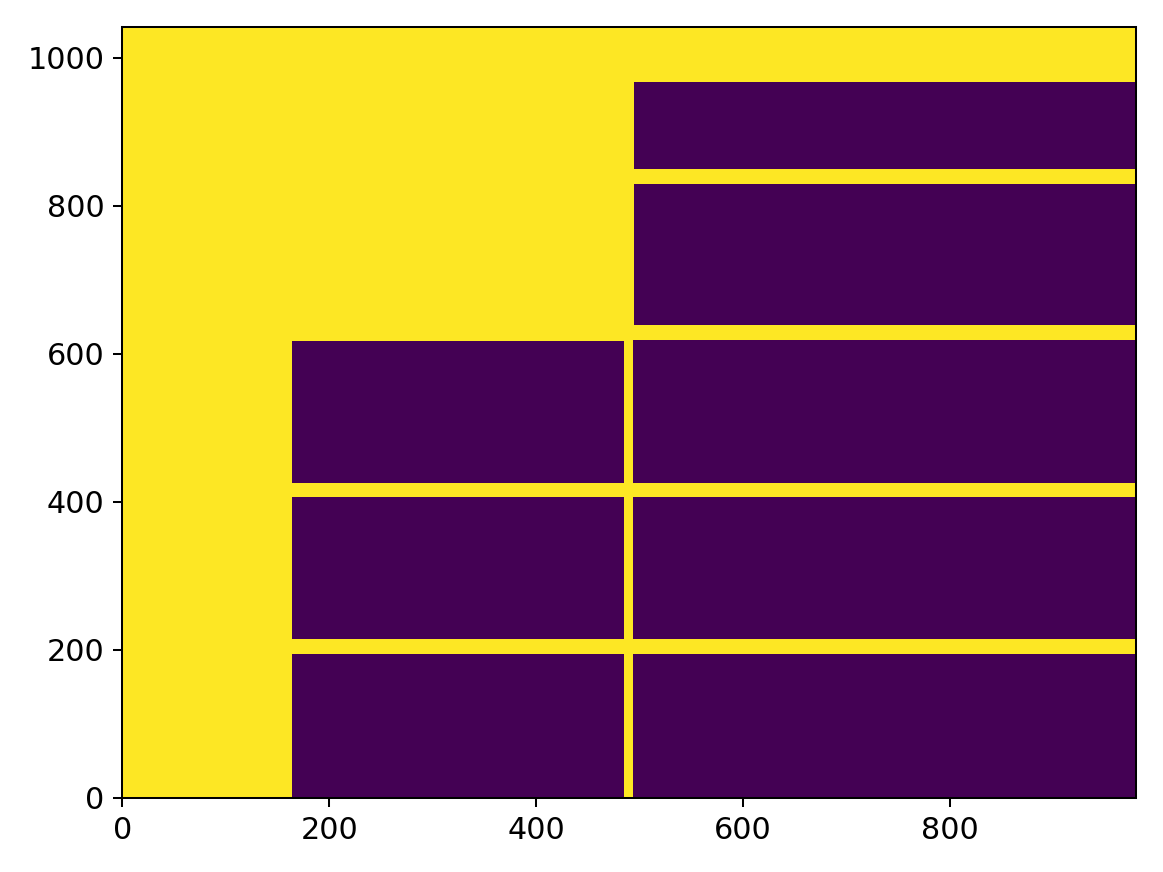

In [11]:
mask =np.load( '/home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/SWong/Mask/' + 'mask_waxs_2020C3_SWong.npy')
show_img(mask)

## Define data analysis parameters and methods

### A GiWAXS

In [12]:
username = 'Test'
beamline = 'CMS'
cycle='2020_C3'

#geometry   =  'Reflection'
geometry   = 'Transmission'
wav_m = 1E-10 * (12.398/13.5)
sdd_mm = 261.0 #273.9
b_xy = [   461, 1043  -  396 ]  
bs_xy = [ 0.0, 0.0]   
incident_angle = 0
det_str = 'Pilatus800'
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )

    
## Setup the class
SC = CMS_Scattering( pargs_sc  )



### Methods

In [13]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= F
check_stitch = F
do_stitch = F
do_Qciravg = F
show_Qciravg_roi = F 
do_Qciravg_sector = F   
show_Qciravg_sector = F 
do_Qqphi = F 
do_q_qphi = F
do_p_qphi = F  



if T:    
    ###########################
    #for WAXS
    ###########################   
    do_plot_raw = T # True
    save_raw= T
    do_qimg = T
    do_Qciravg = T
    show_Qciravg_roi = T    
    do_Qciravg_sector = T   
    show_Qciravg_sector = T    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [     10,    90,  180,  -100   ]  
    do_Qqphi = T 
    do_q_qphi = T
    do_p_qphi = T   

    

In [14]:
sample_list = ks[ 1:2 ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list,  sam_dict[sample_list[0]] )

['SW_100nmAgNWs_50min'] ['SW_100nmAgNWs_50min_x0.000_y0.000_T-273.150C_30.00s_35560_waxs.tiff']


In [15]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py

# Run the data analysis

The sample is: SW_100nmAgNWs_50min.
The filelist for this sample is: ['SW_100nmAgNWs_50min_x0.000_y0.000_T-273.150C_30.00s_35560_waxs.tiff'].
Directory  /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/  already exists


<IPython.core.display.Javascript object>


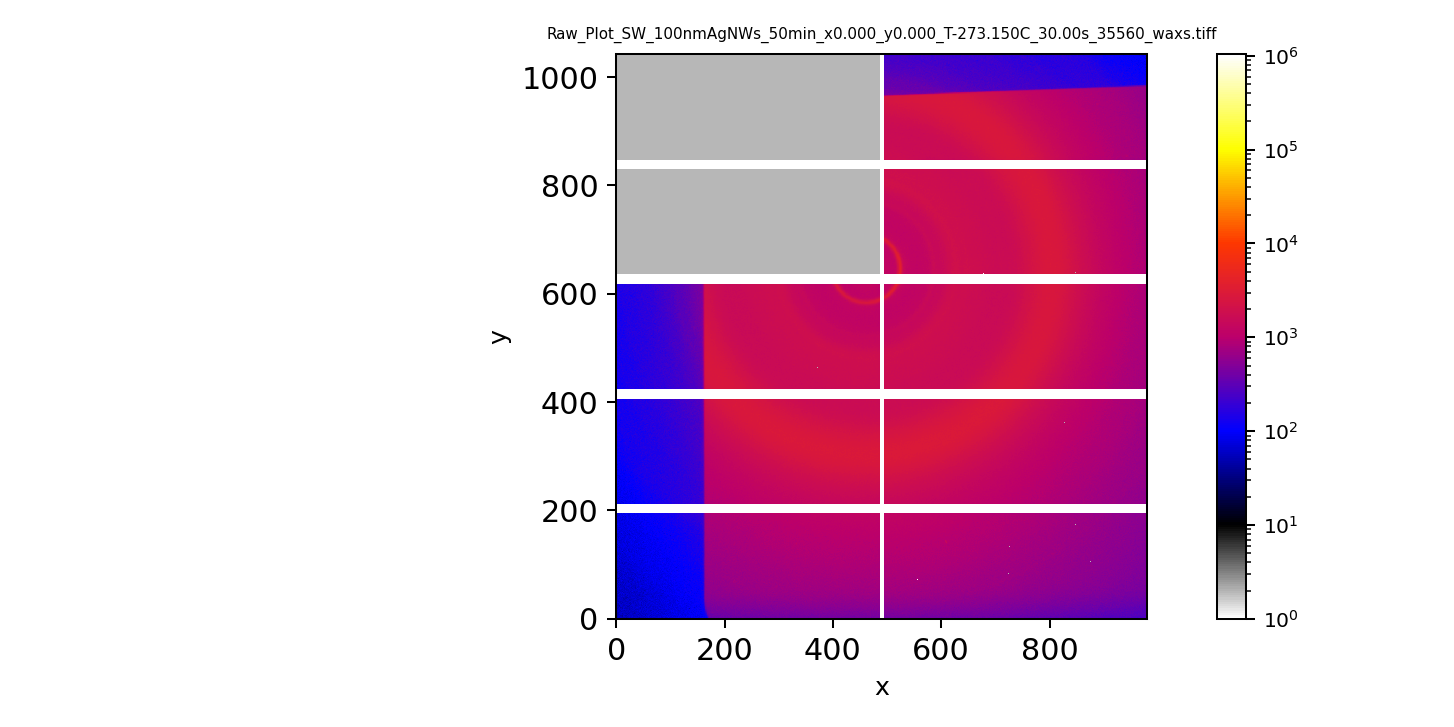

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


<IPython.core.display.Javascript object>


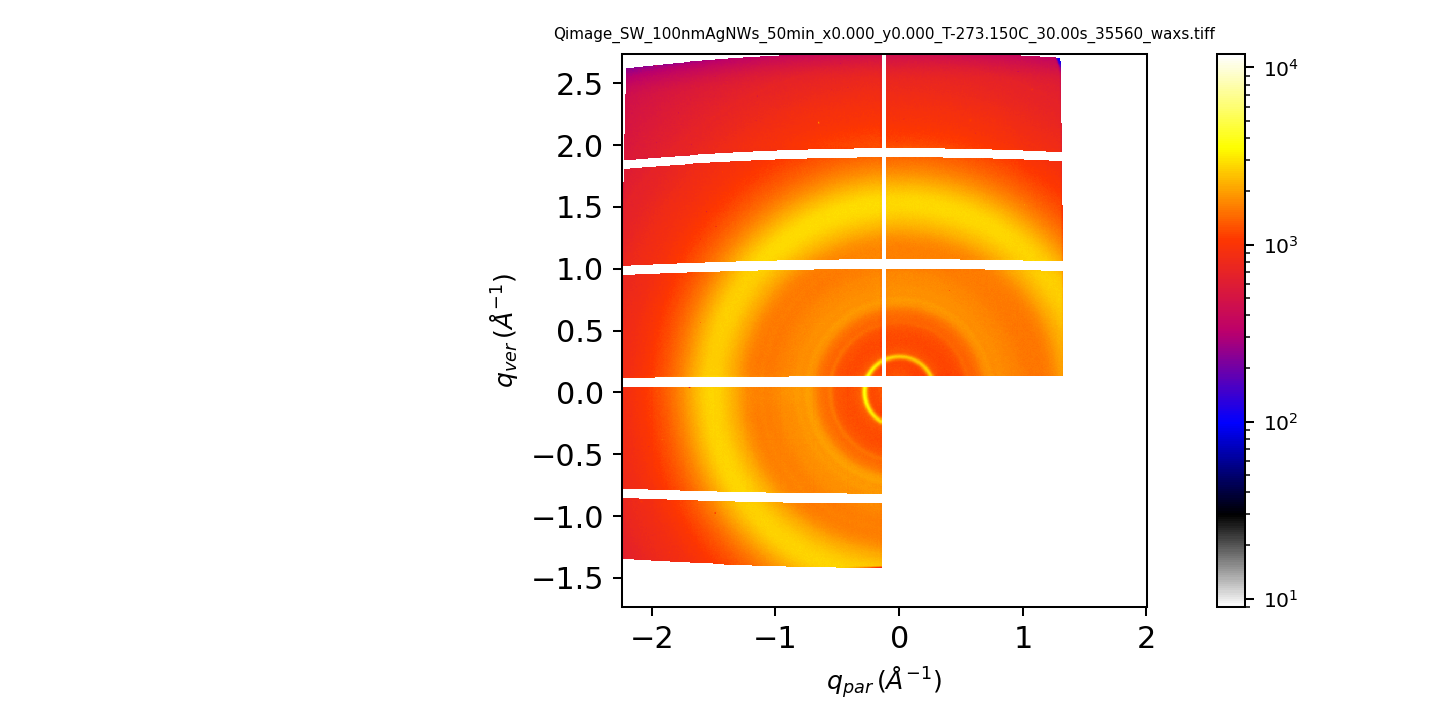

The file: Cir_Avg_SW_100nmAgNWs_50min.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/Cir_Avg/


<IPython.core.display.Javascript object>


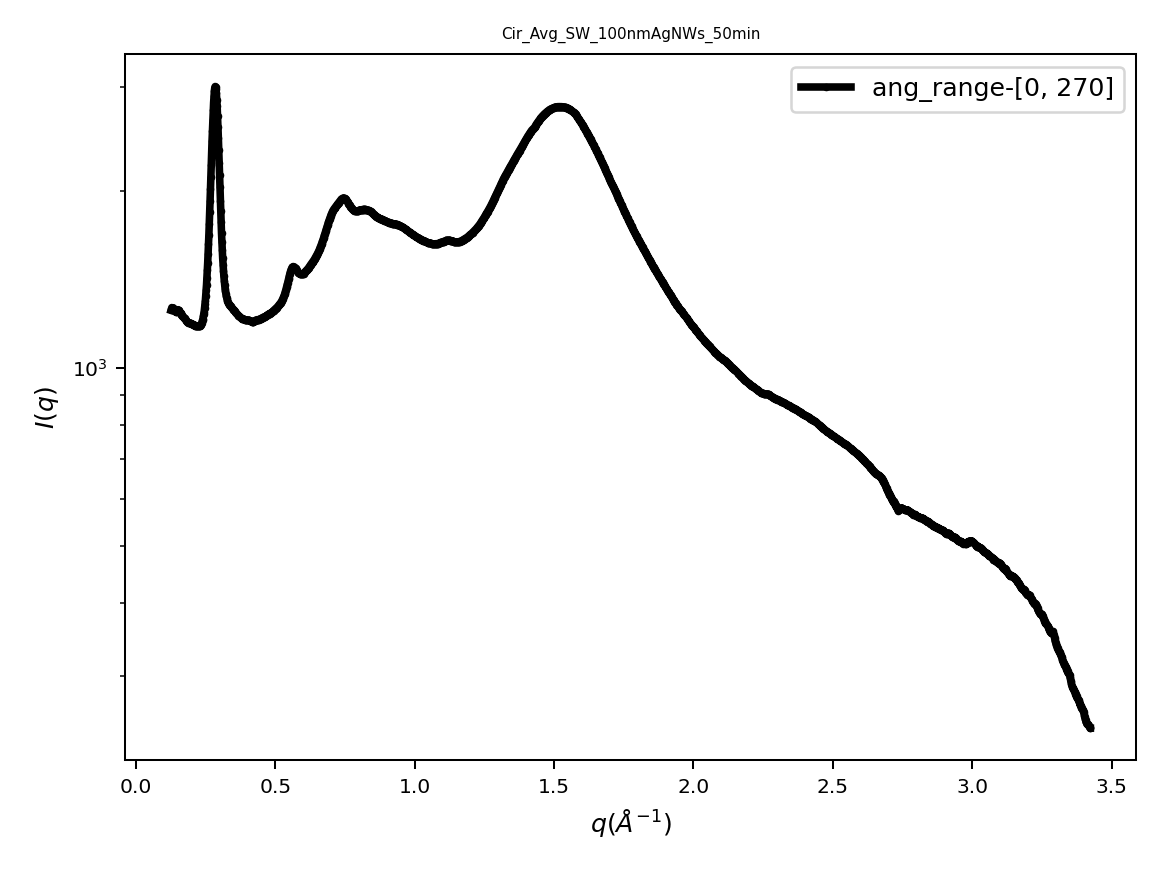

<IPython.core.display.Javascript object>


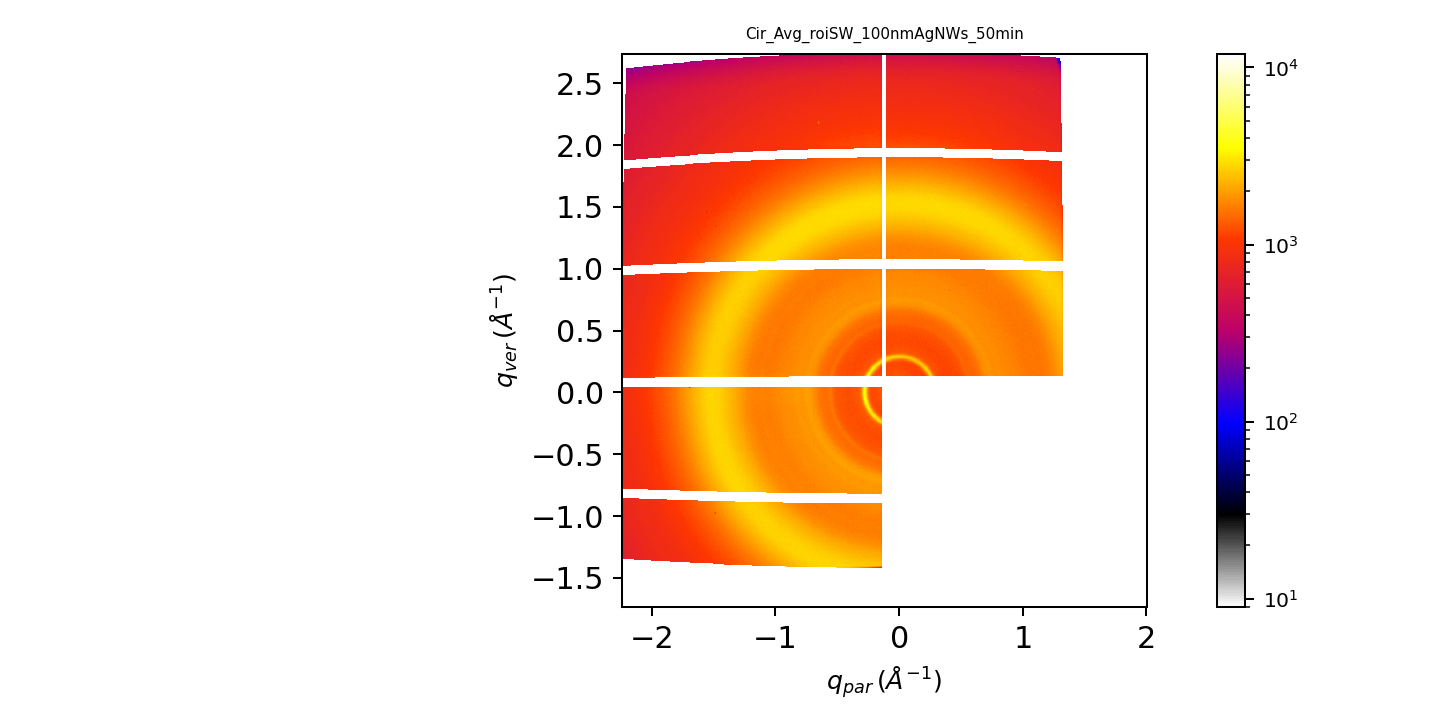

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg_Sector_SW_100nmAgNWs_50min_angle=0_20.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_50min_angle=80_100.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_50min_angle=170_190.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/Cir_Avg_Sector/
The file: Cir_Avg_Sector_SW_100nmAgNWs_50min_angle=-110_-90.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/Cir_Avg_Sector/


<IPython.core.display.Javascript object>


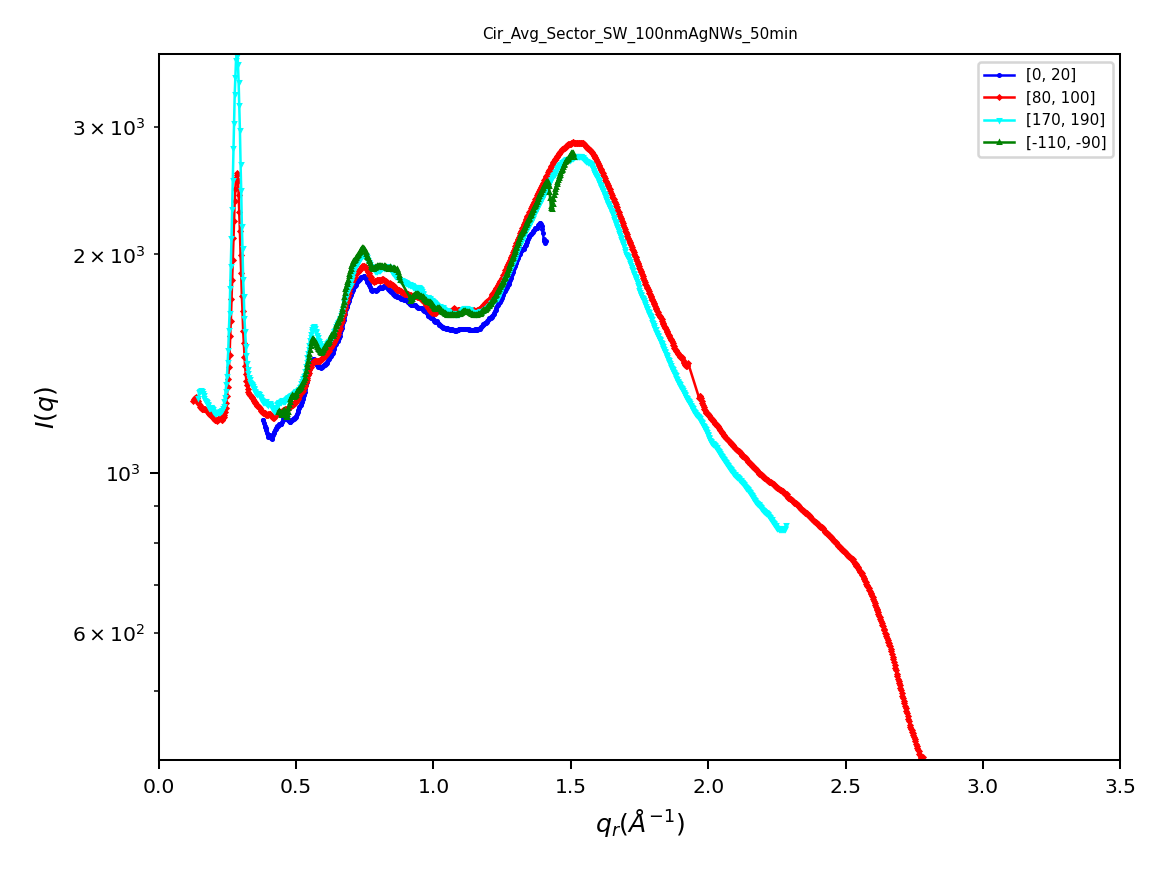

<IPython.core.display.Javascript object>


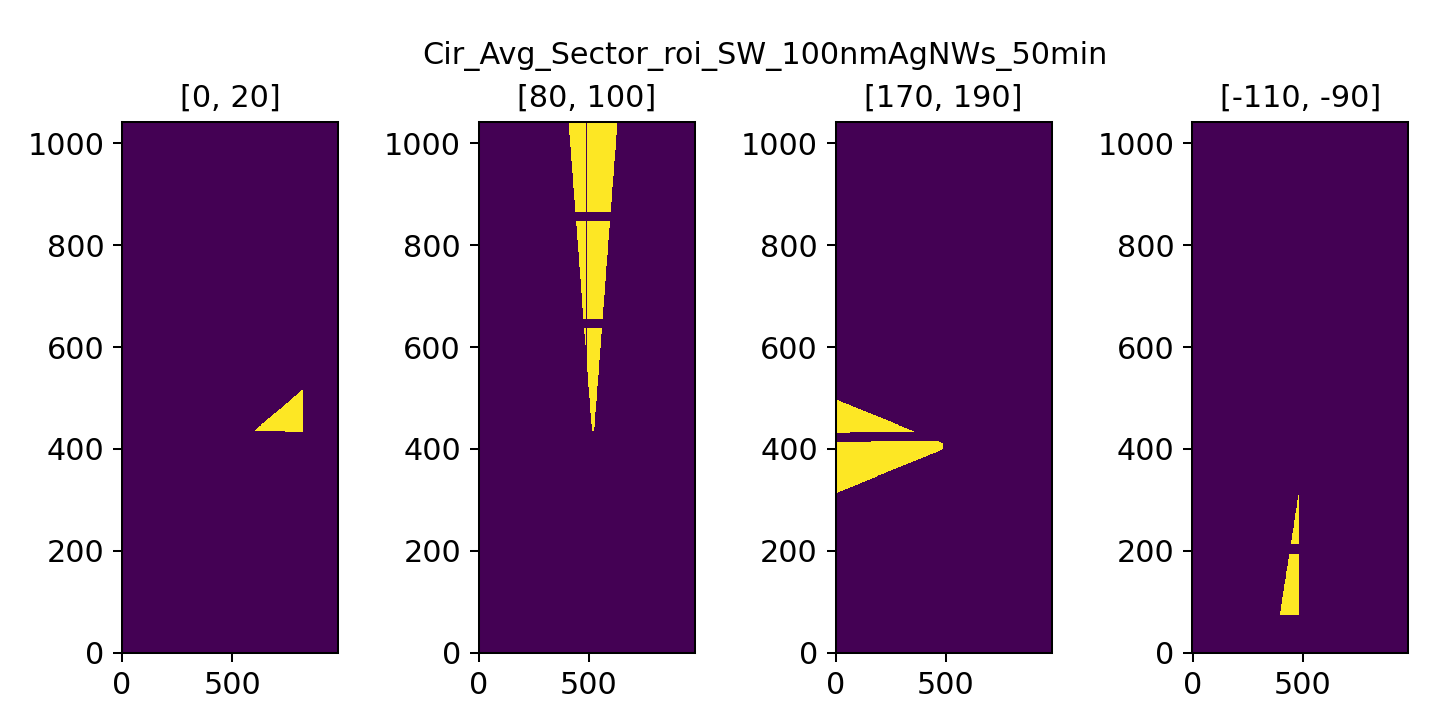

<IPython.core.display.Javascript object>


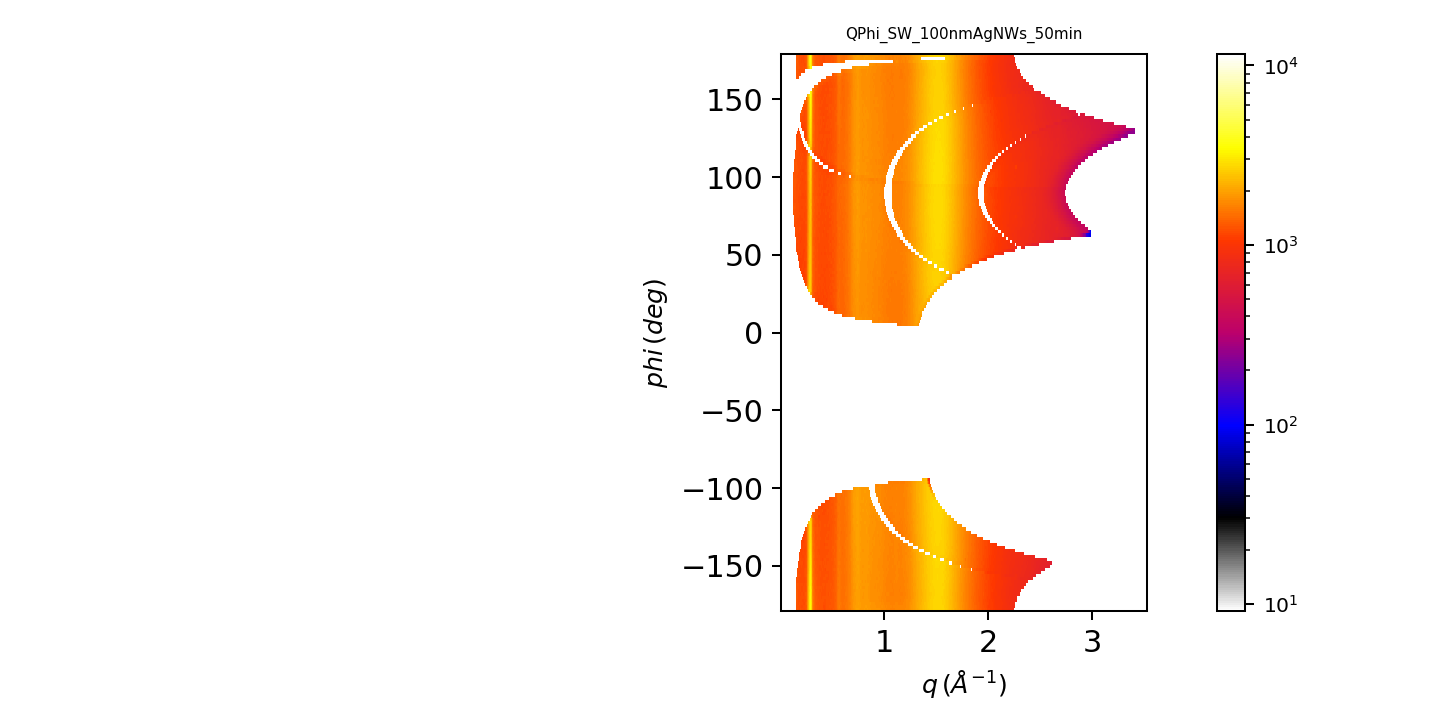

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )
/home/group/Software/pyScatt/pyScatt/generic_functions.py:642: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


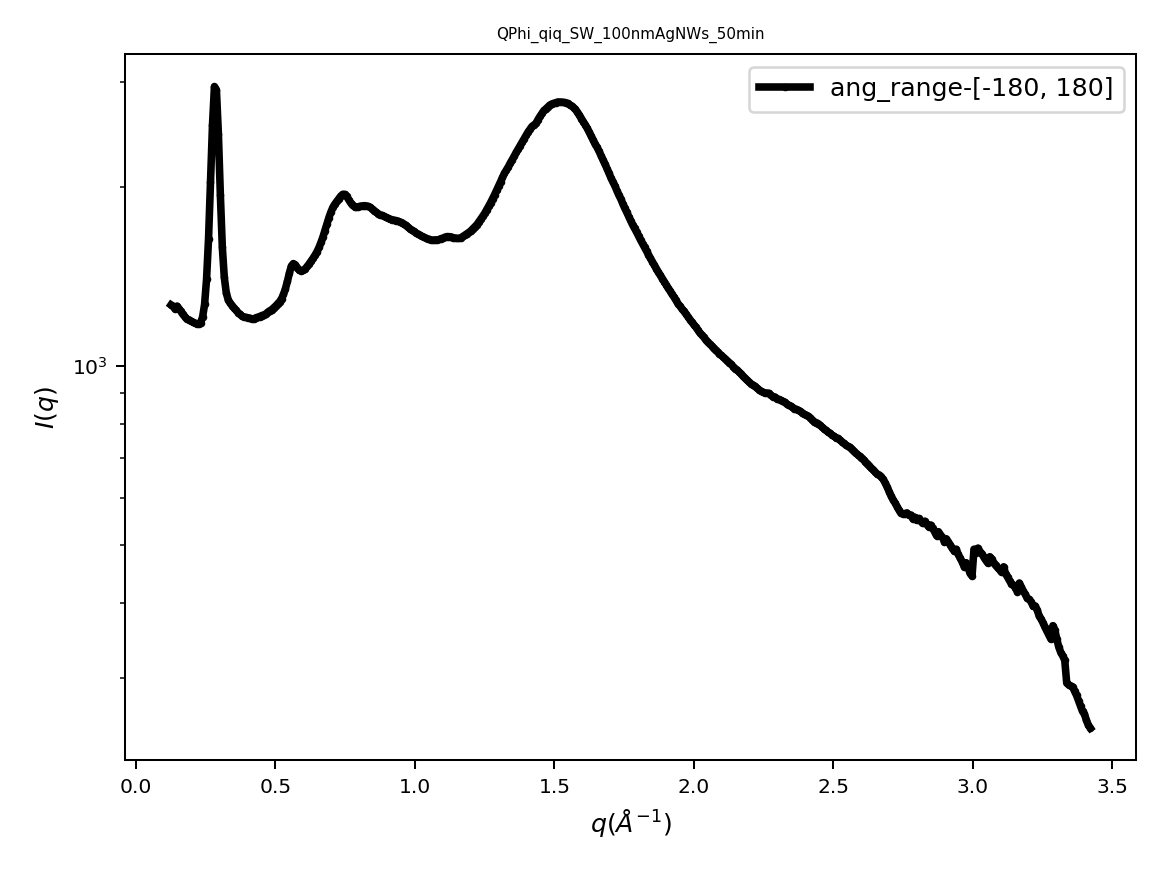

The file: QPhi_qiq_SW_100nmAgNWs_50min.csv is saved in /home/yuzhang/NSLSII_Data_Link/CMS/2020_Cycle3/Test/Results/WAXS/QPhi/


/home/group/Software/pyScatt/pyScatt/generic_functions.py:642: RuntimeWarning: invalid value encountered in true_divide
  return sums/cts


<IPython.core.display.Javascript object>


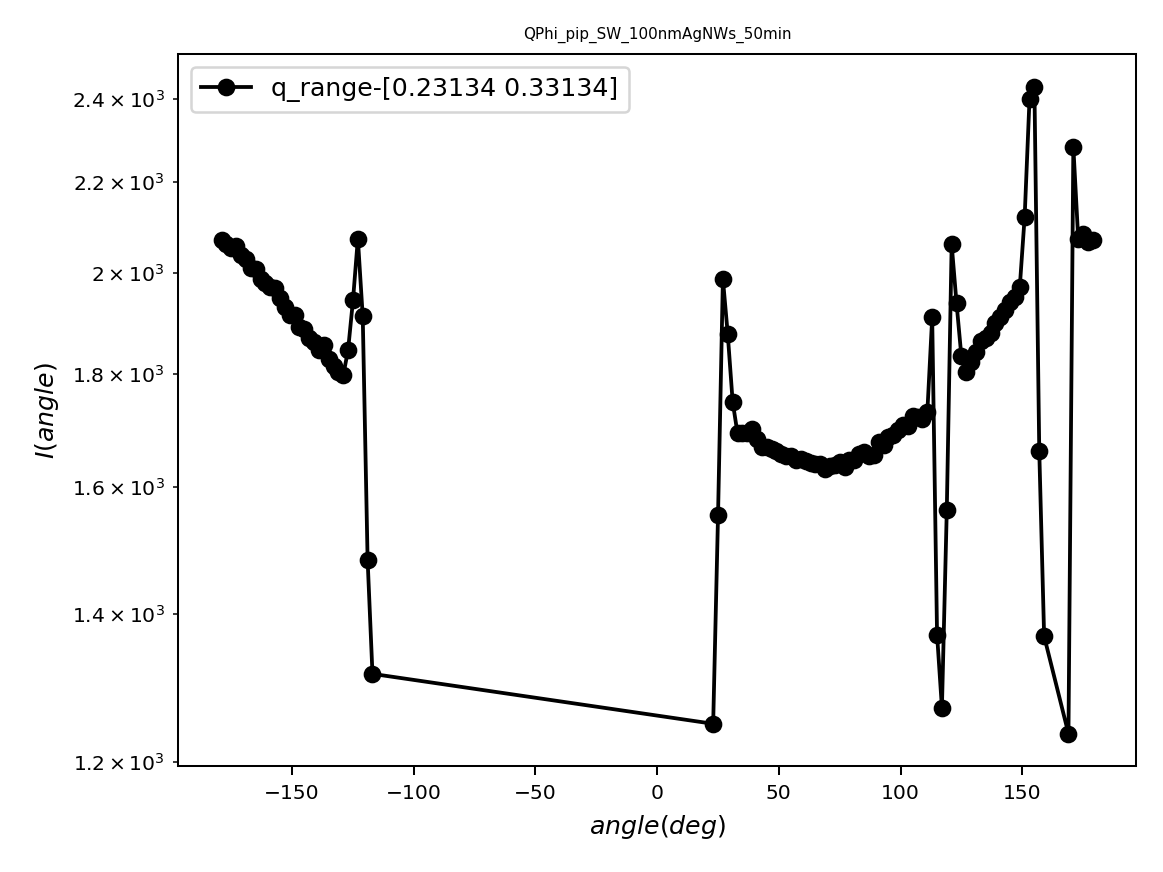

Done


In [16]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam) 
    fps = sam_dict[sam] 
    print( 'The filelist for this sample is: %s.'%fps)     
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    PATH = 'WAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')
    SC = CMS_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {} 
    for i in range(N):
        res = {}
        #######################################
        #plot the raw data
        ########################################
        if do_plot_raw:
            run_plot_raw( SC, ki=i,  vmin= None, vmax=None,mask=None, fontsize=6, )  
        #######################################
        #plot qimg
        ########################################              
        if do_qimg:
            hmask = ( SC.imgs[i] >= hotpixel_thres )
            maskc = mask +  hmask            
            qimg, qx, qz = SC.img_to_qimg( img = SC.imgs[i], bins=None, 
                                           mask= maskc, x='Qr', y='Qz', method = 'ai'  )            
            run_save_qimage(  SC, ki=i  )  
            run_plot_qimage(  SC, ki=i,  zlim=[0.3, 3 ] ) 
        #######################################
        #Do circular average
        ########################################  
        if do_Qciravg: 
            #qz_roi_range= [ 0.05,  qz_st.max() ] 
            qz_roi_range= None
            SC.qmask=None
            qmaskn, q_ca,iq_ca,mask_ca = run_qciravg( SC, ciravg_bins=2500, Prange= [0,270], Qrange= None,
                               qx_roi_range=None,qz_roi_range=qz_roi_range,dtype='qimg',    )
            run_save_ciravg(  SC   )  
            peaks = None 
            run_plot_ciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
            if show_Qciravg_roi:
                run_plot_qciravg_roi(SC,qx=SC.qx,qy=SC.qz,img_roi=SC.qimg*mask_ca,zlim=[0.3, 3 ],fontsize=6,)  

        #######################################
        #Do sector circular average
        ########################################  
        if do_Qciravg_sector:  
            Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
            qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(SC.qimg , SC.qx, SC.qz,
                                        Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
            run_save_ciravg_sector( SC  )
            run_plot_ciravg_sector( SC, xlim=[0,3.5], )#ylim=[.1, 1e5]  )        
            if show_Qciravg_sector:
                run_plot_ciravg_sector_roi( SC  )    

        #######################################
        #Do q-phi analysis
        ########################################              
        if do_Qqphi:  
            qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;            
            q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg, SC.qx, SC.qz,
                                                      Qrange=Qrange,Prange=Prange,                                                      
                                                      bins=qphi_bins,mask=SC.qmask) 
            run_save_Qqphi( SC  )
            run_plot_Qqphi( SC, zlim=[0.3, 3 ], fontsize=6, vmin= None, vmax=None, aspect= 0.015, )

            if do_q_qphi:
                q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
                run_save_Qqphi( SC   )
                run_plot_q_iq_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )

            if do_p_qphi:  
                #q_range_roi = None 
                qPeak, iqPeak = find_max_peak(q_QPq,  iq_QPq, xrange=[0.1,6])
                q_range_roi = [ qPeak -.05,  qPeak + .05 ]
                p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
                run_save_q_iq_qphi( SC  )
                run_plot_p_ip_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )                    
       ## save data to h5 file 
        res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                     do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                     do_qimg=do_qimg, do_qphi = do_Qqphi,  
                    do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                            ) 
        K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
        K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
        RES[ SC.md['filenames'][i] ] = res
    K='md';RES[K] = {};RES[K].update( SC.md   ) 
    if save_raw:
        res2 = SC.res_to_dict(  save_raw=True )
        RES.update( res2   )
    dicttoh5( RES, os.path.join(outDir_HDF, '%s.h5'%sam),
                         h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')      

        
    
    
    
    
    

# THE END

In [17]:
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py
#%run -i /home/yuzhang/Software/pyScatt/pyScatt/Pipeline_Funcs.py